# Portfolio with the Maximum Calmar Ratio for the Consumer Durables Sector 

In [9]:
from pandas_datareader import data
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [10]:
# Establishing Dates
start = "2017-01-01"
end = "2021-1-1"

# Establishing Assets
assets = ['TITAN.NS', 'HAVELLS.NS', 'VOLTAS.NS', 'CROMPTON.NS', 
         'BATAINDIA.NS', 'KAJARIACER.NS', 'RAJESHEXPO.NS', 'RELAXO.NS', 'BLUESTARCO.NS']



#252 trading days in a year
N = 252

#1% risk free rate
rf =0.02

# Creating an empty dataframe
df_prices = pd.DataFrame()

# Getting the "Adj Close" data from Yahoo Finance by defining a function
# This function lists the price data as daily percent change 
def YahooData(dataframe, assets_list, start_date, end_date):
    for i in assets_list:
        dataframe[i] = data.DataReader(i, data_source = "yahoo", start=start_date, end=end_date)['Adj Close']
    return dataframe

# Running the function that we just made and saving the results to the DataFrame
df = YahooData(df_prices, assets, start, end)

# Calculating Log Return
df = np.log(df/df.shift(1))

# Dropping the first row because it's N/A
df = df.dropna()

# Viewing df head
df

TITAN.NS  HAVELLS.NS  VOLTAS.NS  CROMPTON.NS  BATAINDIA.NS  \
Date                                                                     
2017-01-03  0.041642    0.002921   0.013009     0.044262      0.035157   
2017-01-04  0.032498    0.023920   0.009275    -0.024019      0.000432   
2017-01-05 -0.004459    0.023640   0.025433    -0.026632      0.015101   
2017-01-06 -0.007992    0.003471  -0.023499     0.004376      0.003925   
2017-01-09 -0.001691    0.010751   0.016069     0.007696     -0.019673   
...              ...         ...        ...          ...           ...   
2020-12-28  0.031357    0.008558   0.006208     0.001682      0.026343   
2020-12-29 -0.002238    0.005683  -0.002024     0.033607     -0.015842   
2020-12-30  0.008084   -0.004522   0.006670    -0.002169     -0.002085   
2020-12-31  0.009328    0.012632   0.007111     0.032584     -0.000917   
2021-01-01 -0.005471   -0.006845   0.007000    -0.006591     -0.003647   

            KAJARIACER.NS  RAJESHEXPO.NS  RELAXO.NS  BLUESTARCO.NS  
Date                                                                
2017-01-03       0.005623       0.021853  -0.015283       0.016880  
2017-01-04      -0.010350       0.021796   0.003624       0.000714  
2017-01-05       0.018271       0.041430   0.003611       0.003766  
2017-01-06      -0.004359      -0.005630  -0.002614      -0.000203  
2017-01-09       0.027454      -0.017790  -0.005373       0.009507  
...                   ...            ...        ...            ...  
2020-12-28      -0.002470       0.000718   0.001861      -0.013527  
2020-12-29       0.003702      -0.002875  -0.008654       0.017511  
2020-12-30      -0.000580       0.001233   0.002124       0.011860  
2020-12-31       0.020026       0.007674   0.010428      -0.000562  
2021-01-01       0.008139      -0.011275   0.022772       0.006904  

[988 rows x 9 columns]

In [11]:
# Creating 10000 random simulations of each portfolio weight configuration
num_runs = 10000 # number of rows/iterations

# Creating a Matrix with 10000 rows, with each row representing a random portfolio:
    #first 3 columns are Mean Returns, Standard Deviation, and Sortino Ratio
    # remaining columns are each assets random weight within that random portfolio
result = np.zeros((num_runs,(len(assets)+3)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
df = df.copy()

for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(assets))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    ### daily return of the portfolio based on a given set of weights
    df['portfolio_ret'] = df.iloc[:,0]*weights[0]+df.iloc[:,1]*weights[1]+df.iloc[:,2]*weights[2]
  
                       
    # Calculating mean
    E = df['portfolio_ret'].mean()
    
    
    # Annualizing mean
    E = E*252
    

    
    # Calculating Drawdown
    def max_drawdown(return_series):
        comp_ret = (return_series+1).cumprod()
        peak = comp_ret.expanding(min_periods=1).max()
        dd = 1 - (comp_ret/peak)
        return dd.max()

    max_drawdown = max_drawdown(df['portfolio_ret'])
   
    #Calculating Annualised Calmar
    Calmar = E / max_drawdown
    
                   
    # Populating the 'result' array with the required values: Mean, Drawdown, Calmar followed by the weights                   
    result[i,0] = E
    result[i,1] = max_drawdown
    result[i,2] = Calmar
    
    for j in range(len(assets)):
        result[i,j+3]= weights[j]

In [13]:
# Converting 'result' into a DataFrame

columns = ['Mean','Drawdown', 'Calmar'] + assets

result = pd.DataFrame(result,columns=columns)
result

Mean  Drawdown    Calmar  TITAN.NS  HAVELLS.NS  VOLTAS.NS  \
0     0.057850  0.101533  0.569772  0.017889    0.147369   0.050590   
1     0.074530  0.125187  0.595352  0.002945    0.122047   0.167860   
2     0.091593  0.159072  0.575795  0.004342    0.220161   0.132253   
3     0.173751  0.236710  0.734026  0.269220    0.047405   0.216596   
4     0.085045  0.133375  0.637638  0.068189    0.152302   0.073975   
...        ...       ...       ...       ...         ...        ...   
9995  0.062789  0.098410  0.638033  0.052574    0.042485   0.123693   
9996  0.135390  0.188090  0.719816  0.174598    0.099138   0.160637   
9997  0.106066  0.162238  0.653770  0.075713    0.098765   0.201929   
9998  0.120902  0.165451  0.730739  0.167116    0.097406   0.116253   
9999  0.177847  0.245031  0.725813  0.211151    0.135245   0.235003   

      CROMPTON.NS  BATAINDIA.NS  KAJARIACER.NS  RAJESHEXPO.NS  RELAXO.NS  \
0        0.149595      0.127592       0.165590       0.035964   0.079331   
1        0.097669      0.143938       0.064316       0.157391   0.087673   
2        0.003612      0.192258       0.112527       0.082232   0.046257   
3        0.092619      0.022489       0.023102       0.266911   0.032867   
4        0.055834      0.101548       0.075813       0.169691   0.187566   
...           ...           ...            ...            ...        ...   
9995     0.081050      0.012005       0.120579       0.201797   0.059469   
9996     0.033214      0.039087       0.015044       0.161717   0.147393   
9997     0.218073      0.088456       0.012413       0.114984   0.137329   
9998     0.114654      0.070841       0.145567       0.103983   0.064506   
9999     0.033445      0.027424       0.158210       0.098515   0.048475   

      BLUESTARCO.NS  
0          0.226080  
1          0.156160  
2          0.206357  
3          0.028790  
4          0.115081  
...             ...  
9995       0.306349  
9996       0.169173  
9997       0.052338  
9998       0.119675  
9999       0.052533  

[10000 rows x 12 columns]

In [14]:
Max_Calmar = result.iloc[result['Calmar'].idxmax()]
Max_Calmar

Mean             0.167604
Drawdown         0.209073
Calmar           0.801656
TITAN.NS         0.351533
HAVELLS.NS       0.063870
VOLTAS.NS        0.042722
CROMPTON.NS      0.068546
BATAINDIA.NS     0.169858
KAJARIACER.NS    0.042523
RAJESHEXPO.NS    0.123107
RELAXO.NS        0.116149
BLUESTARCO.NS    0.021694
Name: 3814, dtype: float64

In [15]:
Min_Drawdown = result.iloc[result['Drawdown'].idxmin()]
Min_Drawdown

Mean             0.003500
Drawdown         0.006422
Calmar           0.545026
TITAN.NS         0.001152
HAVELLS.NS       0.009557
VOLTAS.NS        0.002282
CROMPTON.NS      0.004347
BATAINDIA.NS     0.253965
KAJARIACER.NS    0.262431
RAJESHEXPO.NS    0.159799
RELAXO.NS        0.275774
BLUESTARCO.NS    0.030692
Name: 8537, dtype: float64

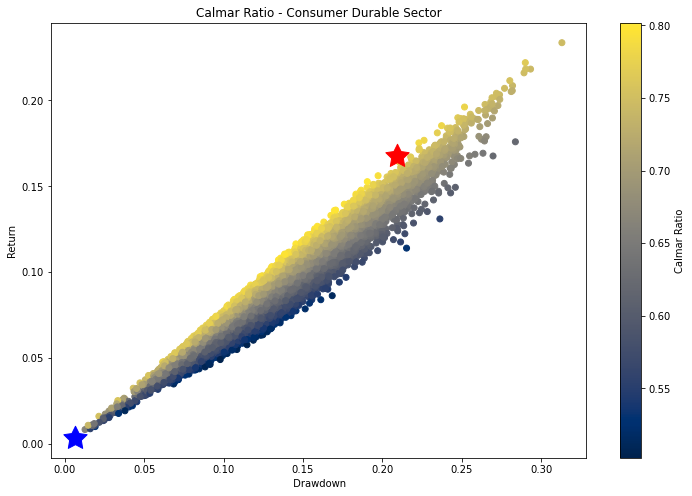

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(x=result['Drawdown'],y=result['Mean'],c=result['Calmar'],cmap='cividis')
plt.colorbar(label='Calmar Ratio')
plt.xlabel(' Drawdown')
plt.ylabel('Return')

plt.title('Calmar Ratio - Consumer Durable Sector')
#Plot a red star to highlight position of the portfolio with highest Sortino Ratio
plt.scatter(Max_Calmar[1],Max_Calmar[0],marker=(5,1,0),color='r',s=600)

#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(Min_Drawdown[1],Min_Drawdown[0],marker=(5,1,0),color='b',s=600)
plt.show()